In [1]:
%matplotlib inline
import sys
import json
import itertools
import numpy as np
import pylab as plt
import pandas as pd
import networkx as nx
from scipy import stats
import random
from datetime import datetime
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
import nltk

In [2]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("game_statistics_feb_2023.csv")
#source: https://www.kaggle.com/datasets/patkle/video-game-sales-data-from-vgchartzcom

In [3]:
df

,title,total_sales,total_shipped,publisher,developer,release_date,platform,japan_sales,na_sales,other_sales,pal_sales,pos,user_score,vgchartz_score,critic_score,last_update
0,Professor Layton,NaN,18.00m,Nintendo,Level-5,10th Feb 08,Series,NaN,NaN,NaN,NaN,201,NaN,NaN,NaN,04th Feb 20
1,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,NaN,202,NaN,NaN,NaN,20th Oct 20
2,Pokémon Diamond / Pearl Version,NaN,17.67m,Nintendo,Game Freak,28th Apr 07,DS,NaN,NaN,NaN,NaN,203,NaN,NaN,8.6,NaN
3,Elden Ring,NaN,17.50m,Bandai Namco Entertainment,From Software,25th Feb 22,All,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,28th Feb 22
4,Grand Theft Auto: Vice City,NaN,17.50m,Rockstar Games,Rockstar North,29th Oct 02,All,NaN,NaN,NaN,NaN,205,NaN,NaN,NaN,14th Oct 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62321,Zombieland: Double Tap - Road Trip,NaN,NaN,GameMill Entertainment,High Voltage Software,15th Oct 19,PC,NaN,NaN,NaN,NaN,62514,NaN,NaN,NaN,25th Sep 20
62322,Zombillie,NaN,NaN,Forever Entertainment S.A.,Forever Entertainment S.A.,29th Mar 18,NS,NaN,NaN,NaN,NaN,62515,NaN,NaN,NaN,26th Mar 18
62323,Zone of the Enders: The 2nd Runner MARS,NaN,NaN,Konami,Cygames,06th Sep 18,PC,NaN,NaN,NaN,NaN,62516,NaN,NaN,NaN,26th Sep 18
62324,Zoo Tycoon: Ultimate Animal Collection,NaN,NaN,Microsoft Studios,Frontier Developments,31st Oct 17,XOne,NaN,NaN,NaN,NaN,62517,NaN,NaN,NaN,26th Sep 18


In [4]:
df['platform'].nunique()

80

In [5]:
df.dtypes

title              object
total_sales        object
total_shipped      object
publisher          object
developer          object
release_date       object
platform           object
japan_sales        object
na_sales           object
other_sales        object
pal_sales          object
pos                 int64
user_score        float64
vgchartz_score    float64
critic_score      float64
last_update        object
dtype: object

In [6]:
df.isnull().sum()

title                 0
total_sales       43537
total_shipped     58108
publisher             0
developer            17
release_date       5716
platform              0
japan_sales       55650
na_sales          49738
other_sales       47261
pal_sales         49537
pos                   0
user_score        61921
vgchartz_score    60163
critic_score      55791
last_update       46030
dtype: int64

In [7]:
df = df.dropna(subset=["total_sales"])

In [8]:
def m_to_million(v):
    if isinstance(v, str) and 'm' in v:
        return float(v.replace("m", "")) * 1_000_000
    return v

df["total_sales"] = df["total_sales"].apply(m_to_million)

In [9]:
df.groupby("publisher").sum().sort_values("total_sales", ascending=False)

,total_sales,pos,user_score,vgchartz_score,critic_score
publisher,,,,,
Activision,723020000.0,10051785,102.8,411.9,2191.8
Electronic Arts,644060000.0,7294166,61.2,480.7,2411.8
EA Sports,485660000.0,3772073,16.7,253.3,1528.3
Ubisoft,462270000.0,11588982,106.5,429.5,2072.0
Sony Computer Entertainment,332910000.0,5464127,135.3,458.5,1295.2
...,...,...,...,...,...
Just Flight,0.0,22809,0.0,0.0,0.0
Land Ho,0.0,22991,0.0,0.0,0.0
Image Space Incorporated,0.0,22716,0.0,0.0,0.0


In [10]:
df.groupby("title").sum().sort_values("total_sales", ascending=False)

,total_sales,pos,user_score,vgchartz_score,critic_score
title,,,,,
Grand Theft Auto V,64290000.0,1039,9.0,9.5,28.1
Call of Duty: Black Ops,30990000.0,10649,0.0,17.4,40.5
Call of Duty: Modern Warfare 3,30710000.0,6787,0.0,17.1,30.0
Call of Duty: Black Ops II,29590000.0,9637,0.0,17.8,8.6
Call of Duty: Ghosts,28800000.0,15078,0.0,6.2,47.0
...,...,...,...,...,...
Pang: Magical Michael,0.0,22867,0.0,0.0,0.0
Uwasa no Midori-Kun!! 2 Futari no Midori!?,0.0,22169,0.0,0.0,0.0
Paint by DS,0.0,22386,0.0,0.0,0.0


In [11]:
df.sort_values("total_sales", ascending=False)

,title,total_sales,total_shipped,publisher,developer,release_date,platform,japan_sales,na_sales,other_sales,pal_sales,pos,user_score,vgchartz_score,critic_score,last_update
63,Grand Theft Auto V,20320000.0,NaN,Rockstar Games,Rockstar North,17th Sep 13,PS3,0.99m,6.37m,3.12m,9.85m,164,NaN,9.5,9.4,NaN
122,Grand Theft Auto V,19390000.0,NaN,Rockstar Games,Rockstar North,18th Nov 14,PS4,0.60m,6.06m,3.02m,9.71m,190,NaN,NaN,9.7,03rd Jan 18
22,Grand Theft Auto: Vice City,16150000.0,NaN,Rockstar Games,Rockstar North,28th Oct 02,PS2,0.47m,8.41m,1.78m,5.49m,223,NaN,NaN,9.6,NaN
28,Grand Theft Auto V,15860000.0,NaN,Rockstar Games,Rockstar North,17th Sep 13,X360,0.06m,9.06m,1.42m,5.33m,229,NaN,NaN,NaN,NaN
35,Call of Duty: Black Ops 3,15090000.0,NaN,Activision,Treyarch,06th Nov 15,PS4,0.41m,6.18m,2.44m,6.05m,236,NaN,NaN,NaN,14th Jan 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22098,Memories Off 6: T-Wave,0.0,NaN,5pb,5pb. Games,27th Aug 09,X360,0.00m,NaN,NaN,NaN,22291,NaN,NaN,NaN,NaN
22097,Bratz: Super Babyz,0.0,NaN,THQ,Creat Studios,25th Feb 08,PC,NaN,NaN,0.00m,0.00m,22290,NaN,NaN,NaN,NaN
22096,Bloodbath,0.0,NaN,United Developers,Freedom Factory Studios,27th Jun 14,PS3,NaN,NaN,0.00m,0.00m,22289,NaN,NaN,NaN,01st May 18
22095,WSC REAL 08: World Snooker Championship,0.0,NaN,Koch Media,Blade Interactive,14th Nov 08,Wii,NaN,NaN,0.00m,0.00m,22288,NaN,NaN,NaN,NaN


In [12]:
df['release_date'].astype(str)

22       28th Oct 02
28       17th Sep 13
35       06th Nov 15
63       17th Sep 13
71       09th Nov 10
            ...     
23002    23rd Apr 10
23003    01st Aug 07
23004    09th Feb 07
23005    24th Apr 02
23006    10th Mar 09
Name: release_date, Length: 18789, dtype: object

In [13]:
df=df.dropna(subset=["critic_score"])

In [14]:
df.sort_values("total_sales", ascending=False)

,title,total_sales,total_shipped,publisher,developer,release_date,platform,japan_sales,na_sales,other_sales,pal_sales,pos,user_score,vgchartz_score,critic_score,last_update
63,Grand Theft Auto V,20320000.0,NaN,Rockstar Games,Rockstar North,17th Sep 13,PS3,0.99m,6.37m,3.12m,9.85m,164,NaN,9.5,9.4,NaN
122,Grand Theft Auto V,19390000.0,NaN,Rockstar Games,Rockstar North,18th Nov 14,PS4,0.60m,6.06m,3.02m,9.71m,190,NaN,NaN,9.7,03rd Jan 18
22,Grand Theft Auto: Vice City,16150000.0,NaN,Rockstar Games,Rockstar North,28th Oct 02,PS2,0.47m,8.41m,1.78m,5.49m,223,NaN,NaN,9.6,NaN
305,Call of Duty: Modern Warfare 3,14820000.0,NaN,Activision,Infinity Ward,08th Nov 11,X360,0.13m,9.07m,1.33m,4.29m,257,NaN,NaN,8.7,NaN
308,Call of Duty: Black Ops,14740000.0,NaN,Activision,Treyarch,09th Nov 10,X360,0.11m,9.76m,1.14m,3.73m,259,NaN,NaN,8.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,Sid Meier's Civilization II,0.0,NaN,Microprose,MPS Labs,29th Feb 96,PC,NaN,NaN,0.00m,0.00m,22372,9.7,NaN,9.1,NaN
22192,Dark Messiah Might and Magic,0.0,NaN,Ubisoft,Arkane Studios / Floodgate Entertainment / Kuj...,24th Oct 06,PC,NaN,NaN,0.00m,0.00m,22385,NaN,NaN,7.3,NaN
22197,Pure (JP sales),0.0,NaN,Disney Interactive Studios,Black Rock Studio,25th Jun 09,X360,0.00m,NaN,NaN,NaN,22390,NaN,NaN,7.0,NaN
22220,Tiger Woods PGA Tour 07,0.0,NaN,EA Sports,EA Redwood Shores,10th Oct 06,PC,NaN,NaN,0.00m,0.00m,22413,NaN,NaN,7.8,NaN


In [15]:
df['release_date'] = df['release_date'].str[9:11]

In [16]:
df

,title,total_sales,total_shipped,publisher,developer,release_date,platform,japan_sales,na_sales,other_sales,pal_sales,pos,user_score,vgchartz_score,critic_score,last_update
22,Grand Theft Auto: Vice City,16150000.0,NaN,Rockstar Games,Rockstar North,02,PS2,0.47m,8.41m,1.78m,5.49m,223,NaN,NaN,9.6,NaN
63,Grand Theft Auto V,20320000.0,NaN,Rockstar Games,Rockstar North,13,PS3,0.99m,6.37m,3.12m,9.85m,164,NaN,9.5,9.4,NaN
71,Call of Duty: Black Ops,12670000.0,NaN,Activision,Treyarch,10,PS3,0.48m,6.01m,1.78m,4.40m,301,NaN,8.7,8.7,NaN
115,FIFA 17,10940000.0,NaN,Electronic Arts,EA Canada,16,PS4,0.12m,1.26m,1.61m,7.95m,359,NaN,NaN,8.9,28th Mar 18
122,Grand Theft Auto V,19390000.0,NaN,Rockstar Games,Rockstar North,14,PS4,0.60m,6.06m,3.02m,9.71m,190,NaN,NaN,9.7,03rd Jan 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,Sherlock Holmes: The Awakened,0.0,NaN,Focus Home Interactive,Frogwares,07,PC,NaN,NaN,NaN,0.00m,23187,NaN,NaN,6.0,NaN
22995,Top Spin 2,0.0,NaN,2K Sports,Aspyr,07,PC,NaN,NaN,NaN,0.00m,23188,NaN,NaN,6.8,NaN
22997,Disney Sports Motocross,0.0,NaN,Konami,Konami,03,GBA,NaN,0.00m,NaN,NaN,23190,NaN,NaN,5.2,NaN
22998,Elebits: The Adventures of Kai and Zero,0.0,NaN,Konami,Konami,09,DS,NaN,0.00m,NaN,NaN,23191,NaN,NaN,7.4,NaN


In [17]:
df['release_date'] = pd.to_numeric(df['release_date'])

In [18]:
df = df.dropna(subset=["release_date"])

In [19]:
df['release_date'] = df['release_date'].astype(int)

In [20]:
df = df.drop(df[df.release_date > 23].index)

In [21]:
df

,title,total_sales,total_shipped,publisher,developer,release_date,platform,japan_sales,na_sales,other_sales,pal_sales,pos,user_score,vgchartz_score,critic_score,last_update
22,Grand Theft Auto: Vice City,16150000.0,NaN,Rockstar Games,Rockstar North,2,PS2,0.47m,8.41m,1.78m,5.49m,223,NaN,NaN,9.6,NaN
63,Grand Theft Auto V,20320000.0,NaN,Rockstar Games,Rockstar North,13,PS3,0.99m,6.37m,3.12m,9.85m,164,NaN,9.5,9.4,NaN
71,Call of Duty: Black Ops,12670000.0,NaN,Activision,Treyarch,10,PS3,0.48m,6.01m,1.78m,4.40m,301,NaN,8.7,8.7,NaN
115,FIFA 17,10940000.0,NaN,Electronic Arts,EA Canada,16,PS4,0.12m,1.26m,1.61m,7.95m,359,NaN,NaN,8.9,28th Mar 18
122,Grand Theft Auto V,19390000.0,NaN,Rockstar Games,Rockstar North,14,PS4,0.60m,6.06m,3.02m,9.71m,190,NaN,NaN,9.7,03rd Jan 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,Sherlock Holmes: The Awakened,0.0,NaN,Focus Home Interactive,Frogwares,7,PC,NaN,NaN,NaN,0.00m,23187,NaN,NaN,6.0,NaN
22995,Top Spin 2,0.0,NaN,2K Sports,Aspyr,7,PC,NaN,NaN,NaN,0.00m,23188,NaN,NaN,6.8,NaN
22997,Disney Sports Motocross,0.0,NaN,Konami,Konami,3,GBA,NaN,0.00m,NaN,NaN,23190,NaN,NaN,5.2,NaN
22998,Elebits: The Adventures of Kai and Zero,0.0,NaN,Konami,Konami,9,DS,NaN,0.00m,NaN,NaN,23191,NaN,NaN,7.4,NaN


In [22]:
df = df.rename(columns={'release_date': 'release_year'})

In [23]:
df = df[df["total_sales"]>1]

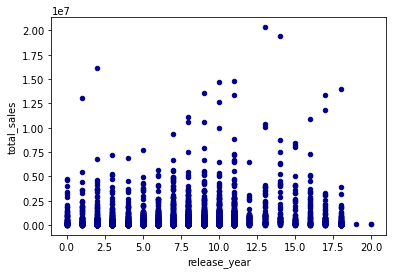

In [24]:
ax1 = df.plot.scatter(x='release_year', y='total_sales', c='DarkBlue')

In [25]:
df.sort_values("total_sales", ascending=True)

,title,total_sales,total_shipped,publisher,developer,release_year,platform,japan_sales,na_sales,other_sales,pal_sales,pos,user_score,vgchartz_score,critic_score,last_update
21590,bit Generations: Dialhex,10000.0,NaN,Nintendo,skip Ltd.,6,GBA,0.01m,NaN,0.00m,NaN,21783,NaN,NaN,7.0,NaN
20608,NHL 2K7,10000.0,NaN,2K Sports,2K Sports,6,XB,NaN,0.01m,0.00m,0.00m,20851,NaN,NaN,7.7,NaN
20634,Army Men: Air Combat - The Elite Missions,10000.0,NaN,3DO,3DO,3,GC,NaN,0.01m,0.00m,0.00m,20803,NaN,NaN,3.8,NaN
20642,Dungeon Explorer: Warriors of Ancient Arts,10000.0,NaN,Hudson Entertainment,Hudson Soft,8,PSP,NaN,0.01m,0.00m,0.00m,20878,NaN,NaN,6.1,NaN
20671,Battlestations: Midway,10000.0,NaN,Eidos Interactive,Eidos Hungary,7,PC,NaN,NaN,0.00m,0.01m,20893,NaN,NaN,7.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Call of Duty: Black Ops,14740000.0,NaN,Activision,Treyarch,10,X360,0.11m,9.76m,1.14m,3.73m,259,NaN,NaN,8.8,NaN
305,Call of Duty: Modern Warfare 3,14820000.0,NaN,Activision,Infinity Ward,11,X360,0.13m,9.07m,1.33m,4.29m,257,NaN,NaN,8.7,NaN
22,Grand Theft Auto: Vice City,16150000.0,NaN,Rockstar Games,Rockstar North,2,PS2,0.47m,8.41m,1.78m,5.49m,223,NaN,NaN,9.6,NaN
122,Grand Theft Auto V,19390000.0,NaN,Rockstar Games,Rockstar North,14,PS4,0.60m,6.06m,3.02m,9.71m,190,NaN,NaN,9.7,03rd Jan 18


In [26]:
df.groupby("publisher").sum().sort_values("total_sales", ascending=False)

,total_sales,release_year,pos,user_score,vgchartz_score,critic_score
publisher,,,,,,
Activision,361790000.0,2176,2147283,102.8,339.9,2081.6
Electronic Arts,353430000.0,2420,1982115,61.2,419.4,2283.1
EA Sports,236550000.0,1612,1103421,16.7,186.8,1487.7
Ubisoft,213270000.0,2437,2451911,98.4,321.1,1964.0
Rockstar Games,190670000.0,357,227516,55.6,71.0,440.5
...,...,...,...,...,...,...
Nobilis,10000.0,9,21068,0.0,0.0,8.1
Outright Games,10000.0,18,20724,0.0,0.0,6.5
Rising Star,10000.0,18,20555,0.0,0.0,7.5


In [27]:
topCompanies=["Activision", "Electronic Arts", "Rockstar Games", "EA Sports", "Ubisoft"]

In [28]:
df = df[df["publisher"].isin(topCompanies)]

In [29]:
df

,title,total_sales,total_shipped,publisher,developer,release_year,platform,japan_sales,na_sales,other_sales,pal_sales,pos,user_score,vgchartz_score,critic_score,last_update
22,Grand Theft Auto: Vice City,16150000.0,NaN,Rockstar Games,Rockstar North,2,PS2,0.47m,8.41m,1.78m,5.49m,223,NaN,NaN,9.6,NaN
63,Grand Theft Auto V,20320000.0,NaN,Rockstar Games,Rockstar North,13,PS3,0.99m,6.37m,3.12m,9.85m,164,NaN,9.5,9.4,NaN
71,Call of Duty: Black Ops,12670000.0,NaN,Activision,Treyarch,10,PS3,0.48m,6.01m,1.78m,4.40m,301,NaN,8.7,8.7,NaN
115,FIFA 17,10940000.0,NaN,Electronic Arts,EA Canada,16,PS4,0.12m,1.26m,1.61m,7.95m,359,NaN,NaN,8.9,28th Mar 18
122,Grand Theft Auto V,19390000.0,NaN,Rockstar Games,Rockstar North,14,PS4,0.60m,6.06m,3.02m,9.71m,190,NaN,NaN,9.7,03rd Jan 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21318,Open Season,10000.0,NaN,Ubisoft,Ubisoft Montreal,6,GBA,NaN,0.01m,0.00m,0.00m,21511,NaN,NaN,7.6,NaN
21404,Shogun: Total War,10000.0,NaN,Electronic Arts,The Creative Assembly,0,PC,NaN,0.00m,0.00m,0.01m,21597,NaN,NaN,8.8,NaN
21540,Devil May Cry 3: Dante's Awakening Special Edi...,10000.0,NaN,Ubisoft,Capcom,6,PC,NaN,NaN,0.00m,0.01m,21733,NaN,NaN,7.1,NaN
21566,Call of Duty,10000.0,NaN,Activision,Infinity Ward,3,PC,NaN,NaN,0.00m,0.01m,21759,NaN,NaN,7.0,NaN


Text(0.5, 1.0, 'Game Sales for Top 5 Publishers')

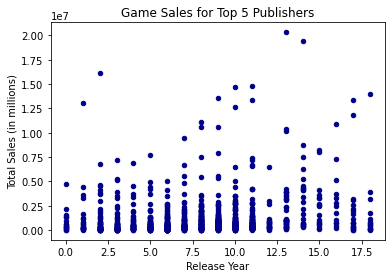

In [30]:
ax2 = df.plot.scatter(x='release_year', y='total_sales', c='DarkBlue')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (in millions)")
plt.title("Game Sales for Top 5 Publishers")

In [31]:
MARKERS = ["o", "^", "s","*","P"] # circle, triangle, square, star, plus

In [32]:
df1 = df[df["publisher"]=="Activision"]
df2 = df[df["publisher"]=="Electronic Arts"]
df3 = df[df["publisher"]=="Rockstar Games"]
df4 = df[df["publisher"]=="EA Sports"]
df5 = df[df["publisher"]=="Ubisoft"]

In [33]:
cl1x = df1["release_year"].values.tolist()
cl1y = df1["total_sales"].values.tolist()
cl2x = df2["release_year"].values.tolist()
cl2y = df2["total_sales"].values.tolist()
cl3x = df3["release_year"].values.tolist()
cl3y = df3["total_sales"].values.tolist()
cl4x = df4["release_year"].values.tolist()
cl4y = df4["total_sales"].values.tolist()
cl5x = df5["release_year"].values.tolist()
cl5y = df5["total_sales"].values.tolist()

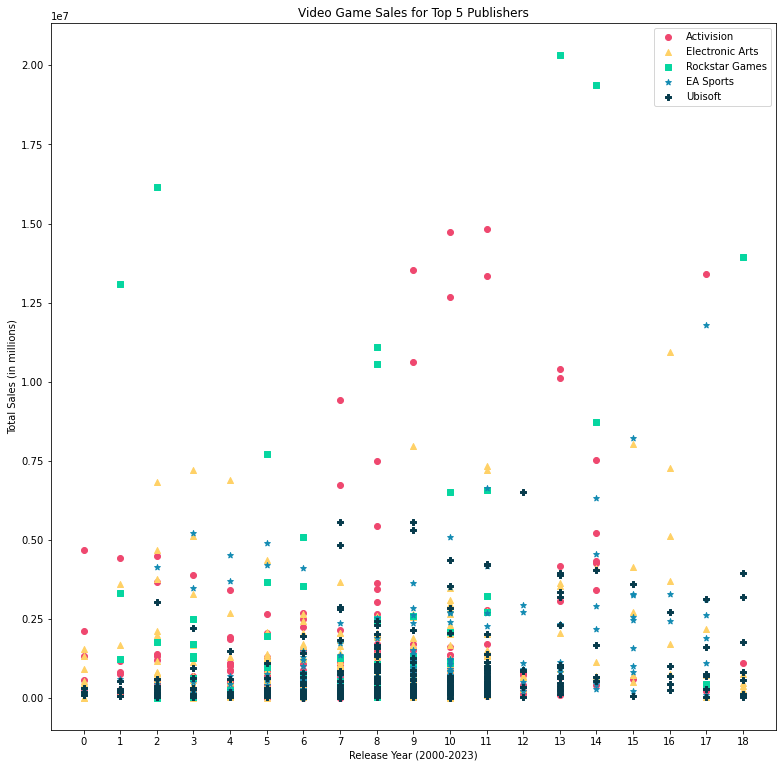

In [104]:
f = plt.figure()
f.set_figwidth(13)
f.set_figheight(13)
plt.xticks(np.arange(0, 23, 1))
plt.xlabel("Release Year (2000-2023)")
plt.ylabel("Total Sales (in millions)")
plt.title("Video Game Sales for Top 5 Publishers")
plt.scatter(cl1x,cl1y,color='#ef476f',marker='o')
plt.scatter(cl2x,cl2y,color='#ffd166',marker='^')
plt.scatter(cl3x,cl3y,color='#06d6a0',marker='s')
plt.scatter(cl4x,cl4y,color='#118ab2',marker='*')
plt.scatter(cl5x,cl5y,color='#073b4c',marker='P')
plt.legend(["Activision", "Electronic Arts", "Rockstar Games", "EA Sports", "Ubisoft"])
plt.show()

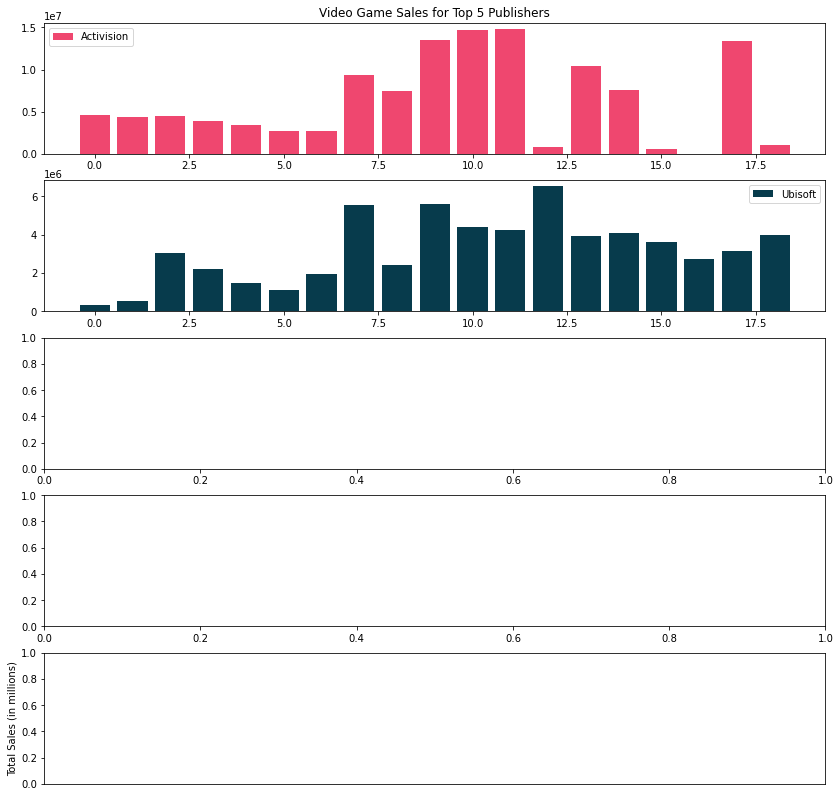

In [105]:
f, axis = plt.subplots(5, 1)

#f = plt.figure()
f.set_figwidth(14)
f.set_figheight(14)
plt.xticks([],[])
#axis[0].ylim(0,22000000)
#axis[0].ylabel("Total Sales (in millions)")
axis[0].set_title("Video Game Sales for Top 5 Publishers")
axis[0].bar(cl1x,cl1y,color='#ef476f')
axis[0].legend(["Activision"])

#f = plt.figure()
#f.set_figwidth(14)
#f.set_figheight(4)
#axis[1].xticks(np.arange(0, 23, 1))
#axis[1].ylim(0,22000000)
#axis[1].xlabel("Release Year (2000-2023)")
plt.ylabel("Total Sales (in millions)")
axis[1].bar(cl5x,cl5y,color='#073b4c')
axis[1].legend(["Ubisoft"])
#axis[1].show()

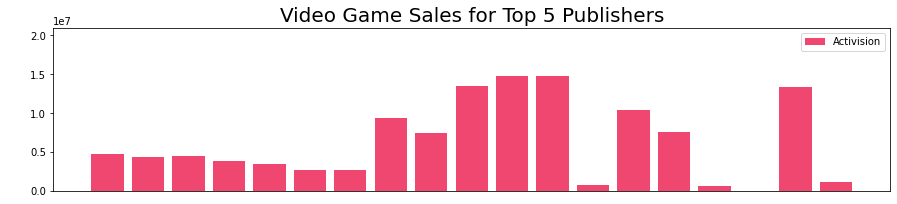

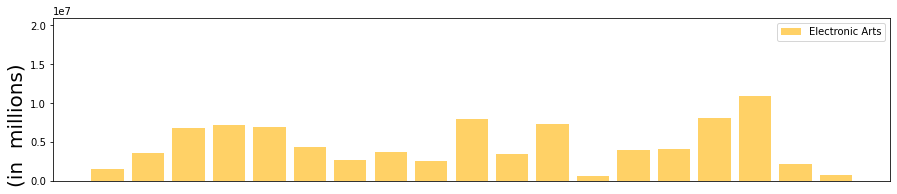

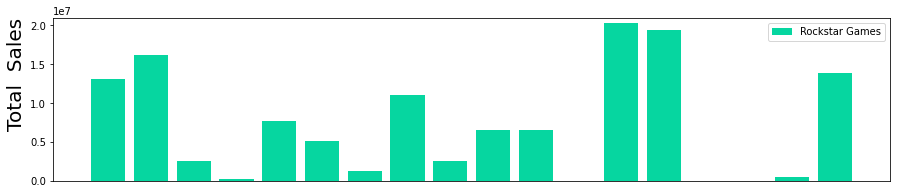

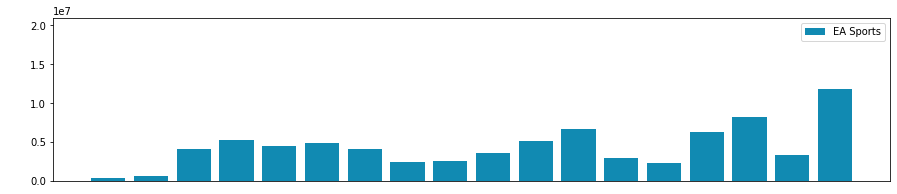

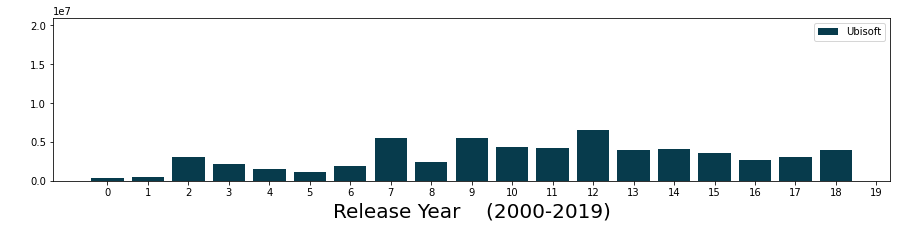

In [118]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.xticks([],[])
plt.ylim(0,21000000)
plt.ylabel(" ", fontsize=20)
plt.title("Video Game Sales for Top 5 Publishers", fontsize=20)
plt.bar(cl1x,cl1y,color='#ef476f')
plt.legend(["Activision"])

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.xticks([],[])
plt.ylim(0,21000000)
plt.ylabel("(in  millions)        ", fontsize=20)
plt.bar(cl2x,cl2y,color='#ffd166')
plt.legend(["Electronic Arts"])

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.xticks([],[])
plt.ylim(0,21000000)
plt.ylabel("        Total  Sales", fontsize=20)
plt.bar(cl3x,cl3y,color='#06d6a0')
plt.legend(["Rockstar Games"])

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.xticks([],[])
plt.ylim(0,21000000)
plt.ylabel(" ", fontsize=20)
plt.bar(cl4x,cl4y,color='#118ab2')
plt.legend(["EA Sports"])

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.xticks(np.arange(0, 23, 1))
plt.ylim(0,21000000)
plt.xlabel("Release Year    (2000-2019)", fontsize=20)
plt.ylabel(" ", fontsize=20)
plt.bar(cl5x,cl5y,color='#073b4c')
plt.legend(["Ubisoft"])
plt.show()